**PC Parts Images Classification using CNN**

Image classification is the task of assigning a label or class to an input image. It is Supervised learning problem where model is trained on a label dataset of images and their corresponding class labels and then used to predict the class label of new or unseen images.

For this type of task of Convolutional Neural network is effective tool for image classification because they are automatically learn the features such as edges, textures, shapes etc. which are important for recognizing objects of images.

1. Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

2. Load Dataset

In [2]:
pc_parts_dir = r"/content/drive/MyDrive/Colab Notebooks/PC parts image classification/pc_parts"

3. ImageDataGenerator is a utility class in Keras used for generating batches of augmented image data. It can create batches of image data with real time data augmentation.


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
img_width, img_height = 150, 150

In [5]:
batch_size = 32

In [6]:
train_dataset = ImageDataGenerator(
    rescale = 1./ 255,
    rotation_range = 10, # rotate images randomly by up to 10 degrees
    width_shift_range = 0.1, # shift images horizontally by up to 10% of the width
    height_shift_range = 0.1, # shift images vertically by up to 10% of the height
    shear_range = 0.1, # shear transformation
    zoom_range = 0.1, # Zoom in or out by up to 10%
    horizontal_flip = True, # flip images horizontally
    vertical_flip = False # don't flip images vertically
)

4. Creating training data and assign labels

We will use the flow_from_directory() method from the keras.preprocessing.image module to create a generator that will read the images from directory.

In [7]:
X_train = train_dataset.flow_from_directory(
 pc_parts_dir,
 target_size = (img_width, img_height),
 batch_size = batch_size,
 class_mode = 'binary'
)

Found 3279 images belonging to 14 classes.


5. Define model

The model is consists of several convolutional layers followed by maxpooling layers, and a fully connected layer with a softmax activation function.

In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (img_width, img_height, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

6. Compile model

In [9]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

7. Train model

In [12]:
history = model.fit(X_train, epochs = 10, steps_per_epoch=len(X_train))

Epoch 1/10
103/103 [==============================] - 108s 1s/step - loss: -12584792388221796352.0000 - accuracy: 0.0860
Epoch 2/10
103/103 [==============================] - 102s 989ms/step - loss: -21020318164286701568.0000 - accuracy: 0.0860
Epoch 3/10
103/103 [==============================] - 106s 1s/step - loss: -33357716038212386816.0000 - accuracy: 0.0860
Epoch 4/10
103/103 [==============================] - 106s 1s/step - loss: -50892012795425980416.0000 - accuracy: 0.0860
Epoch 5/10
103/103 [==============================] - 108s 1s/step - loss: -74912585930611097600.0000 - accuracy: 0.0860
Epoch 6/10
103/103 [==============================] - 105s 1s/step - loss: -106868413648292806656.0000 - accuracy: 0.0860
Epoch 7/10
103/103 [==============================] - 103s 993ms/step - loss: -149128292595444744192.0000 - accuracy: 0.0860
Epoch 8/10
103/103 [==============================] - 102s 984ms/step - loss: -202701864717435011072.0000 - accuracy: 0.0860
Epoch 9/10
103/103 [

8. Plotting Training Accuracy


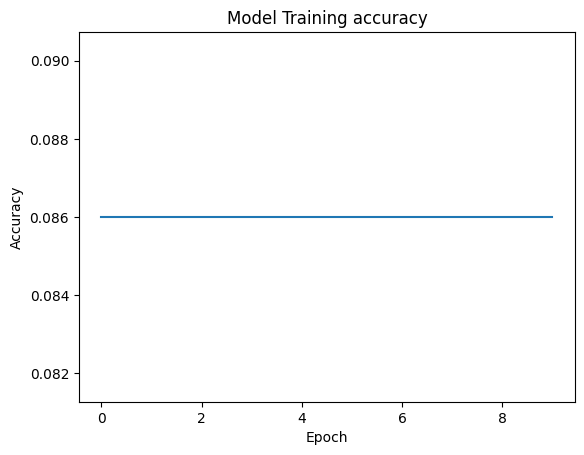

In [24]:
plt.plot(history.history['accuracy'])
plt.title('Model Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

To evaluate the model performance using metrics such as accuracy, precision, recall, F1-score.

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [17]:
# Get predictions
Y_pred = model.predict(X_train)
y_pred = np.argmax(Y_pred, axis = 1)

103/103 [==============================] - 42s 405ms/step


In [18]:
# Get ground truth lables
true_classes = X_train.classes
class_labels = list(X_train.class_indices.keys())

In [19]:
# Classification Report
print('Classification Report')
print(classification_report(true_classes, y_pred, target_names = class_labels))

Classification Report
              precision    recall  f1-score   support

      cables       0.09      1.00      0.17       298
        case       0.00      0.00      0.00       282
         cpu       0.00      0.00      0.00       142
         gpu       0.00      0.00      0.00       156
         hdd       0.00      0.00      0.00       262
     headset       0.00      0.00      0.00       264
    keyboard       0.00      0.00      0.00       268
  microphone       0.00      0.00      0.00       214
     monitor       0.00      0.00      0.00       256
 motherboard       0.00      0.00      0.00       241
       mouse       0.00      0.00      0.00       210
         ram       0.00      0.00      0.00       226
    speakers       0.00      0.00      0.00       296
      webcam       0.00      0.00      0.00       164

    accuracy                           0.09      3279
   macro avg       0.01      0.07      0.01      3279
weighted avg       0.01      0.09      0.02      3279



In [20]:
# Confusion matrix
conf_mat = confusion_matrix(true_classes, y_pred)

In [21]:
import seaborn as sns

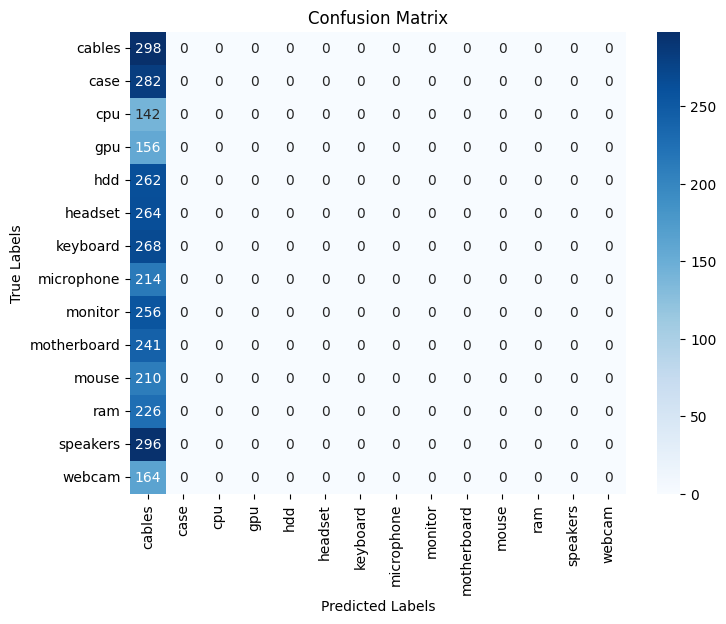

In [23]:
# Plot confusion matrix
plt.figure(figsize = (8,6))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = class_labels, yticklabels = class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()